# Introduction

In this notebook we will initialize and run a relaxing Hopfield Network without learning (rHN-0). We will then plot the energy histogram of the attractor state energy distribution and initial state energy distribution.

In [1]:
import rHN
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [3]:
N = 20

topologymask = 1 - torch.diag(torch.ones(N))

W = (torch.rand((N, N)) - 0.5) * 2

W = torch.triu(W)

W = W + W.T

W = W * topologymask

T = N * 20

dt = 0.1

topologymask = topologymask.to(device)

W = W.to(device)


In [4]:
model = rHN.rHN(W = W,
                W0 = W,
                topologymask=topologymask,
                T = T,
                dt = dt)

In [5]:
relaxations = 1000

perturbations = ((torch.rand((relaxations, N, 1)) > 0.5) * 2 - 1).type(torch.float)

energy = torch.zeros((relaxations, T))

perturbations = perturbations.to(device)

energy = energy.to(device)

for relaxation in tqdm(range(relaxations)):

    model.set_state(perturbations[relaxation])

    energy[relaxation] = model.relax()

energy = energy.T.numpy()

100%|██████████| 1000/1000 [00:15<00:00, 65.69it/s]


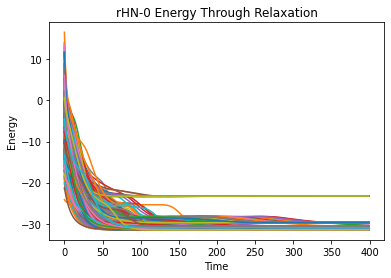

In [6]:
plt.plot(energy)

plt.title('rHN-0 Energy Through Relaxation')

plt.xlabel('Time')

plt.ylabel('Energy')

plt.show()

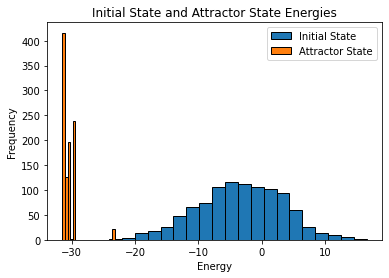

In [7]:
bins = 20

plt.hist(energy[0], bins=bins, label='Initial State', edgecolor='black')

plt.hist(energy[-1], bins=bins, label='Attractor State', edgecolor='black')

plt.title('Initial State and Attractor State Energies')

plt.xlabel('Energy')

plt.ylabel('Frequency')

plt.legend()

plt.show()